<h1><center>Industry Application of Analytics </center></h1>

![](https://media.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif)

# Topics
1. Introduction to Business Analytics. 
2. Basic Statistics 
3. Exploratory Data Analysis with pandas
4. Data Visualization with Seaborn (optional) 
5. Modelling with python:- 
    - Regression 
        - Linear Regression 
    - Classification
        - Logistic Regression (We meet again !)
        - Decision Tree <------------------------------------------------ **This is where we are**
    - Analysing our models
6. Churn Analysis
7. Social Media Analytics
    - Web Scraping
8. Marketing Analytics (maybe !)
9. Time Series Forecasting (maybe maybe !!)
10. Supply Chain Analytics (maybe maybe maybe !!!)

# Decision Tree

In [21]:
# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [11]:
iris = load_iris()

In [12]:
import pandas as pd

In [14]:
df = pd.read_csv('datasets/example_dataset.csv')

In [16]:
df

,Day,Weather,Temperature,Humidity,Wind,Play?
0,1,Sunny,Hot,High,Weak,No
1,2,Cloudy,Hot,High,Weak,Yes
2,3,Sunny,Mild,Normal,Strong,Yes
3,4,Cloudy,Mild,High,Strong,Yes
4,5,Rainy,Mild,High,Strong,No
5,6,Rainy,Cool,Normal,Strong,No
6,7,Rainy,Mild,High,Weak,Yes
7,8,Sunny,Hot,High,Strong,No
8,9,Cloudy,Hot,Normal,Weak,Yes
9,10,Rainy,Mild,High,Strong,No


In [17]:
df.columns

Index(['Day', 'Weather', 'Temperature', 'Humidity', 'Wind', 'Play?'], dtype='object')

In [18]:
X = df[['Weather', 'Temperature', 'Humidity', 'Wind']]

In [24]:
y = df['Play?']

In [26]:
X

,Weather,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Cloudy,Hot,High,Weak
2,Sunny,Mild,Normal,Strong
3,Cloudy,Mild,High,Strong
4,Rainy,Mild,High,Strong
5,Rainy,Cool,Normal,Strong
6,Rainy,Mild,High,Weak
7,Sunny,Hot,High,Strong
8,Cloudy,Hot,Normal,Weak
9,Rainy,Mild,High,Strong


In [28]:
y

0     No
1    Yes
2    Yes
3    Yes
4     No
5     No
6    Yes
7     No
8    Yes
9     No
Name: Play?, dtype: object

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf = DecisionTreeClassifier()

In [23]:
clf = clf.fit(X, y)

ValueError: could not convert string to float: 'Sunny'

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [31]:
le.fit(df['Weather'])

LabelEncoder()

In [32]:
le.transform(df['Weather'])

array([2, 0, 2, 0, 1, 1, 1, 2, 0, 1])

In [35]:
le.transform(['Sunny'])

array([2])

In [36]:
col_list = ['Weather', 'Temperature', 'Humidity', 'Wind', 'Play?']

In [37]:
for i in col_list:
    df[i] = le.fit_transform(df[i])

In [38]:
df

,Day,Weather,Temperature,Humidity,Wind,Play?
0,1,2,1,0,1,0
1,2,0,1,0,1,1
2,3,2,2,1,0,1
3,4,0,2,0,0,1
4,5,1,2,0,0,0
5,6,1,0,1,0,0
6,7,1,2,0,1,1
7,8,2,1,0,0,0
8,9,0,1,1,1,1
9,10,1,2,0,0,0


In [39]:
X = df[['Weather', 'Temperature', 'Humidity', 'Wind']]

In [41]:
y = df['Play?']

In [42]:
X

,Weather,Temperature,Humidity,Wind
0,2,1,0,1
1,0,1,0,1
2,2,2,1,0
3,0,2,0,0
4,1,2,0,0
5,1,0,1,0
6,1,2,0,1
7,2,1,0,0
8,0,1,1,1
9,1,2,0,0


In [43]:
y

0    0
1    1
2    1
3    1
4    0
5    0
6    1
7    0
8    1
9    0
Name: Play?, dtype: int64

In [50]:
clf = DecisionTreeClassifier(min_samples_split = 2)

In [51]:
clf = clf.fit(X, y)

In [52]:
clf

DecisionTreeClassifier()

In [53]:
X

,Weather,Temperature,Humidity,Wind
0,2,1,0,1
1,0,1,0,1
2,2,2,1,0
3,0,2,0,0
4,1,2,0,0
5,1,0,1,0
6,1,2,0,1
7,2,1,0,0
8,0,1,1,1
9,1,2,0,0


# Plotting the decision tree

[Text(0.3333333333333333, 0.9, 'X[0] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5, 0.7, 'X[1] <= 1.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.5, 'X[0] <= 1.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.5, 0.3, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

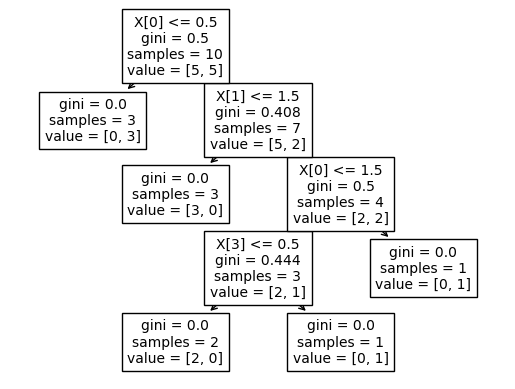

In [54]:
tree.plot_tree(clf)